In [120]:
import numpy as np
import matplotlib.pyplot as plt


## Initialization of a Simple Neural Network

In [121]:
"""
This code is setting up a simple neural network with one hidden layer.
It initializes the training data, weights, and biases for the network.
"""

x_train = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
y_train = np.array([1, -1, -1, 1])

weights_of_hiddenLayer = np.array([np.random.rand(2)*2 - 1, np.random.rand(2)*2 - 1, np.random.rand(2)*2 - 1])
weights_of_outputLayer = np.random.rand(3)*2 - 1

bias_of_hiddenLayer = np.random.rand(3)
bias_of_outputLayer = np.random.rand(1)

## Implementation of Softmax, ReLU, and Sigmoid Activation Functions

In [122]:
"""
This code defines a class "activationFunctions" that implements three common activation functions
used in neural networks: softmax, ReLU, and sigmoid.
"""

class activationFunctions:
  def softmax(self, x):
    return np.exp(x) / np.sum(np.exp(x))

  def ReLU(self, x):
    return np.maximum(0, x)

  def sigmoid(self, x):
    return 1/(1 + np.exp(-x))

## Implementation of Cross-Entropy Loss and Mean Squared Error (MSE) in a Loss Class

In [123]:
"""
This code defines a `Loss` class that implements two common loss functions used in machine learning:
cross-entropy loss and mean squared error (MSE).
"""

class Loss:
  def __init__(self, y, output):
    self.y = y
    self.output = output

  def cross_entropy_loss(self):
    return -np.sum(self.y * np.log(self.output))

  def MSE(self):
    return np.mean(np.square(self.y - self.output))

## MLP Neural Network Class with Training and Prediction Methods

In [124]:
"""
This code defines a class `MLP` (Multi-Layer Perceptron) that implements a simple neural network with one hidden layer and
methods for forward propagation, backpropagation, training, prediction, and accuracy calculation.
"""

class MLP:
  def __init__(self, weights, biases):
    self.weights = weights
    self.biases = biases

  def forward(self, x):
    aF = activationFunctions()
    z_of_hiddenLayer = np.dot(x, (self.weights[0]).T) + self.biases[0]
    self.output_of_hiddenLayer = np.tanh(z_of_hiddenLayer)
    z_of_outputLayer = np.dot(self.output_of_hiddenLayer, self.weights[1]) + self.biases[1]
    self.output_of_outputLayer = aF.softmax(z_of_outputLayer)
    return self.output_of_outputLayer

  def backward(self, x, y, output):
    output_error = output - y
    output_weights_gradient = np.dot(self.output_of_hiddenLayer.T, output_error)
    output_bias_gradient = np.sum(output_error, axis=0, keepdims=True)
    hidden_layer_error = np.dot(np.expand_dims(output_error, 1), np.expand_dims(self.weights[1], 1).T) * (1 - np.power(self.output_of_hiddenLayer, 2))
    hidden_weights_gradient = np.dot(x.T, hidden_layer_error)
    hidden_bias_gradient = np.sum(hidden_layer_error, axis=0)

    return output_weights_gradient, output_bias_gradient, hidden_weights_gradient, hidden_bias_gradient

  def train(self, x, y, epochs, learning_rate):
    losses = []
    for epoch in range(epochs):
      output = self.forward(x)
      lossClass = Loss(y, output)
      loss = lossClass.MSE()
      losses.append(loss)

      output_weights_gradient, output_bias_gradient, hidden_weights_gradient, hidden_bias_gradient = self.backward(x, y, output)
      self.weights[1] -= learning_rate * output_weights_gradient
      self.biases[1] -= learning_rate * output_bias_gradient
      self.weights[0] -= learning_rate * hidden_weights_gradient.T
      self.biases[0] -= learning_rate * hidden_bias_gradient

      if epoch % 100 == 0:
          print('Epoch %d loss: %.2f' % (epoch, loss))

    return losses

  def predict(self, x):
    output = self.forward(x)
    predictions = np.where(output > 0.5, 1, -1)
    return predictions

  def accuracy(self, x, y):
    predictions = self.predict(x)
    print(f"predictions: {predictions}")
    accuracy = np.mean(predictions == y)
    return accuracy


## Training the MLP Neural Network

In [125]:
mlp = MLP([weights_of_hiddenLayer, weights_of_outputLayer], [bias_of_hiddenLayer, bias_of_outputLayer])
losses = mlp.train(x_train, y_train, epochs=1000, learning_rate=0.06)

Epoch 0 loss: 1.09
Epoch 100 loss: 0.63
Epoch 200 loss: 0.63
Epoch 300 loss: 0.63
Epoch 400 loss: 0.63
Epoch 500 loss: 0.63
Epoch 600 loss: 0.63
Epoch 700 loss: 0.62
Epoch 800 loss: 0.62
Epoch 900 loss: 0.62


## Plot Loss

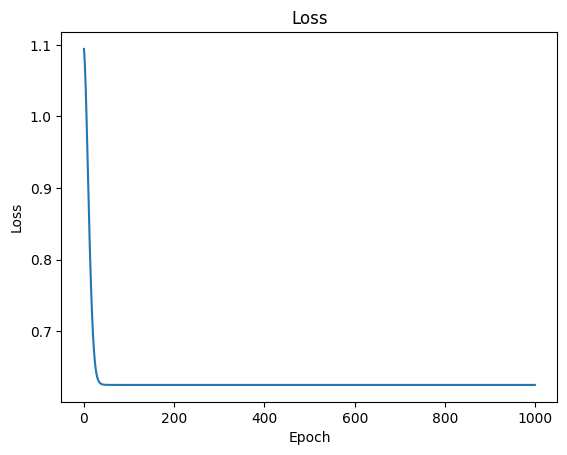

In [127]:
plt.plot(losses)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()